In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

Checking for null values in dataset

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking the aggregations of the dataset

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Checking for Duplicates

In [7]:
df.duplicated().sum()

0

converted 0 and 1 values of SeniorCitizen to yes/no to make it easier to understand

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Creating a bar chart of count of customers by churn

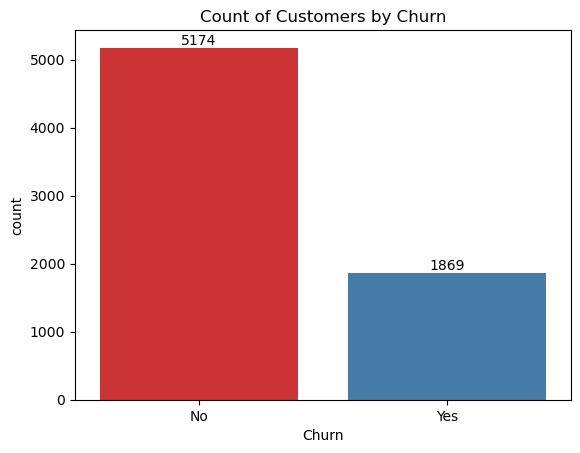

In [89]:
ax = sns.countplot(x = df['Churn'],data = df,palette='Set1')

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

Creating a Pie Chart to find out the %age of churned customers

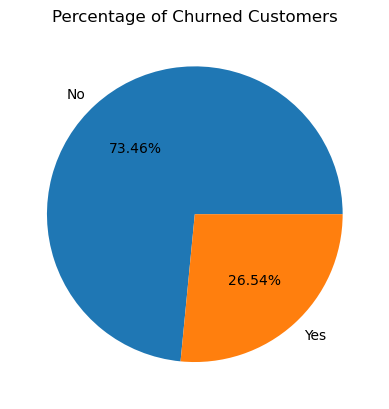

In [85]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

From the given pie chart we can conclude that 26.54% of our customers have churned out.
Now let's explore the reason behind it 

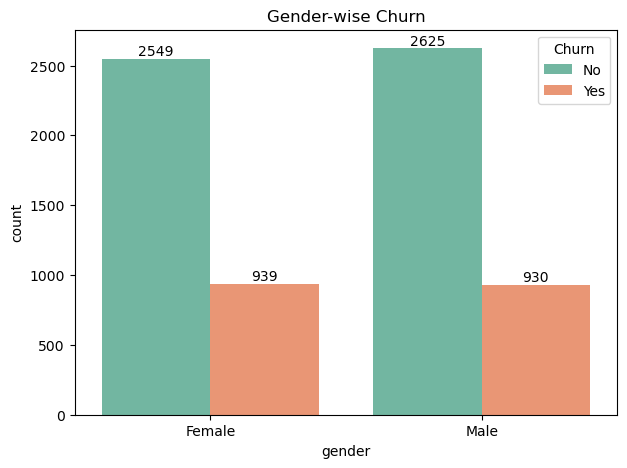

In [102]:
plt.figure(figsize = (7,5))
ab = sns.countplot(x = "gender", data = df, hue = "Churn",palette='Set2')

ab.bar_label(ab.containers[0])
ab.bar_label(ab.containers[1])
    
plt.title("Gender-wise Churn")
plt.show()

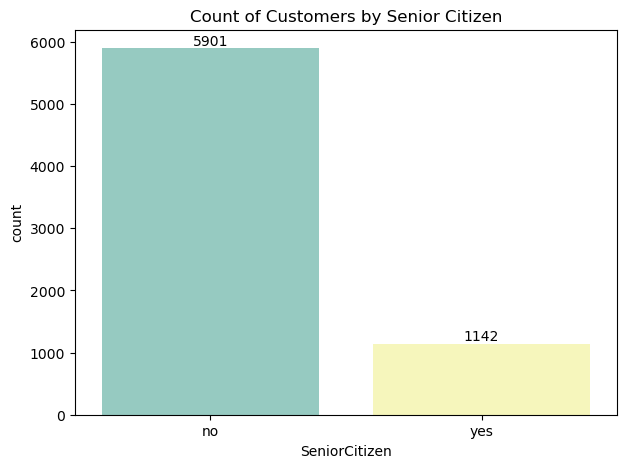

In [82]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "SeniorCitizen", data = df, palette='Set3')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

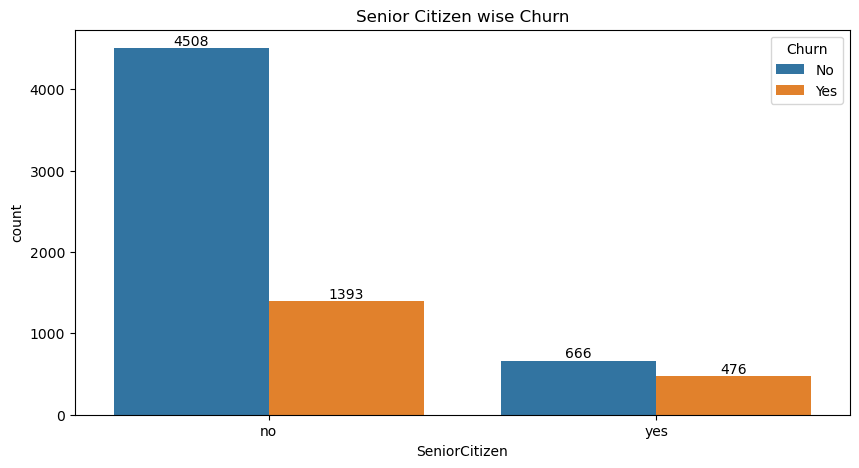

In [101]:
plt.figure(figsize = (10,5))
ab = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")

ab.bar_label(ab.containers[0])
ab.bar_label(ab.containers[1])

plt.title("Senior Citizen wise Churn")
plt.show()

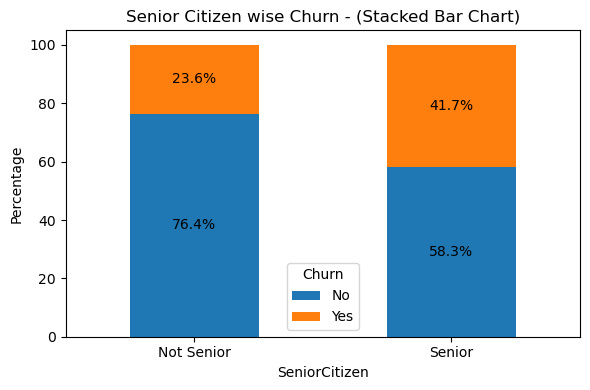

In [80]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

percentages = counts.div(counts.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', stacked=True, figsize=(6, 4))

for i, (index, row) in enumerate(percentages.iterrows()):
    cumulative = 0
    for churn_status in percentages.columns:
        value = row[churn_status]
        if value > 0:
            ax.text(i, cumulative + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        cumulative += value

plt.title("Senior Citizen wise Churn - (Stacked Bar Chart)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=["Not Senior", "Senior"], rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

Comparatively a greater percentage of people in senior citizen category have churned out

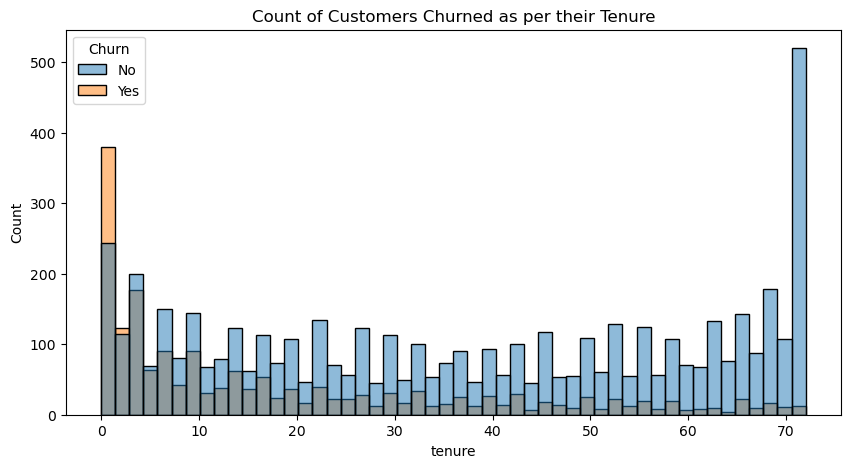

In [64]:
plt.figure(figsize = (10,5))
sns.histplot(x = "tenure", data = df,bins = 50, hue = "Churn")    
plt.title("Count of Customers Churned as per their Tenure")
plt.show()

People who have used our services for a long time have stayed and people who have used our services for one or two months have churned

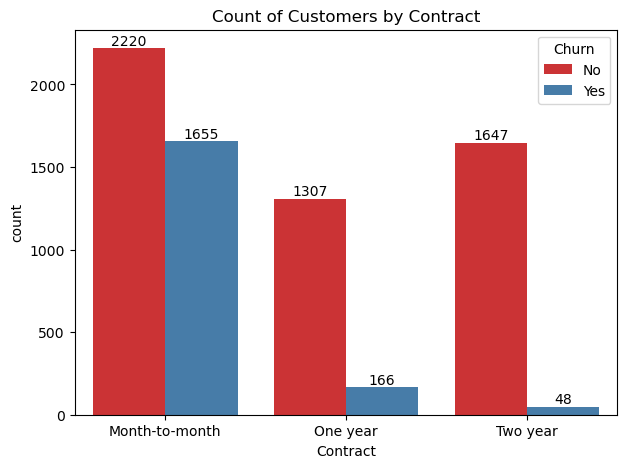

In [100]:
plt.figure(figsize = (7,5))
ab = sns.countplot(x = "Contract", data = df, hue = "Churn", palette='Set1')

ab.bar_label(ab.containers[0])
ab.bar_label(ab.containers[1])

plt.title("Count of Customers by Contract")
plt.show()

People who have month to month contract are likely to churn from those who have 1 or 2 year contract

In [71]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

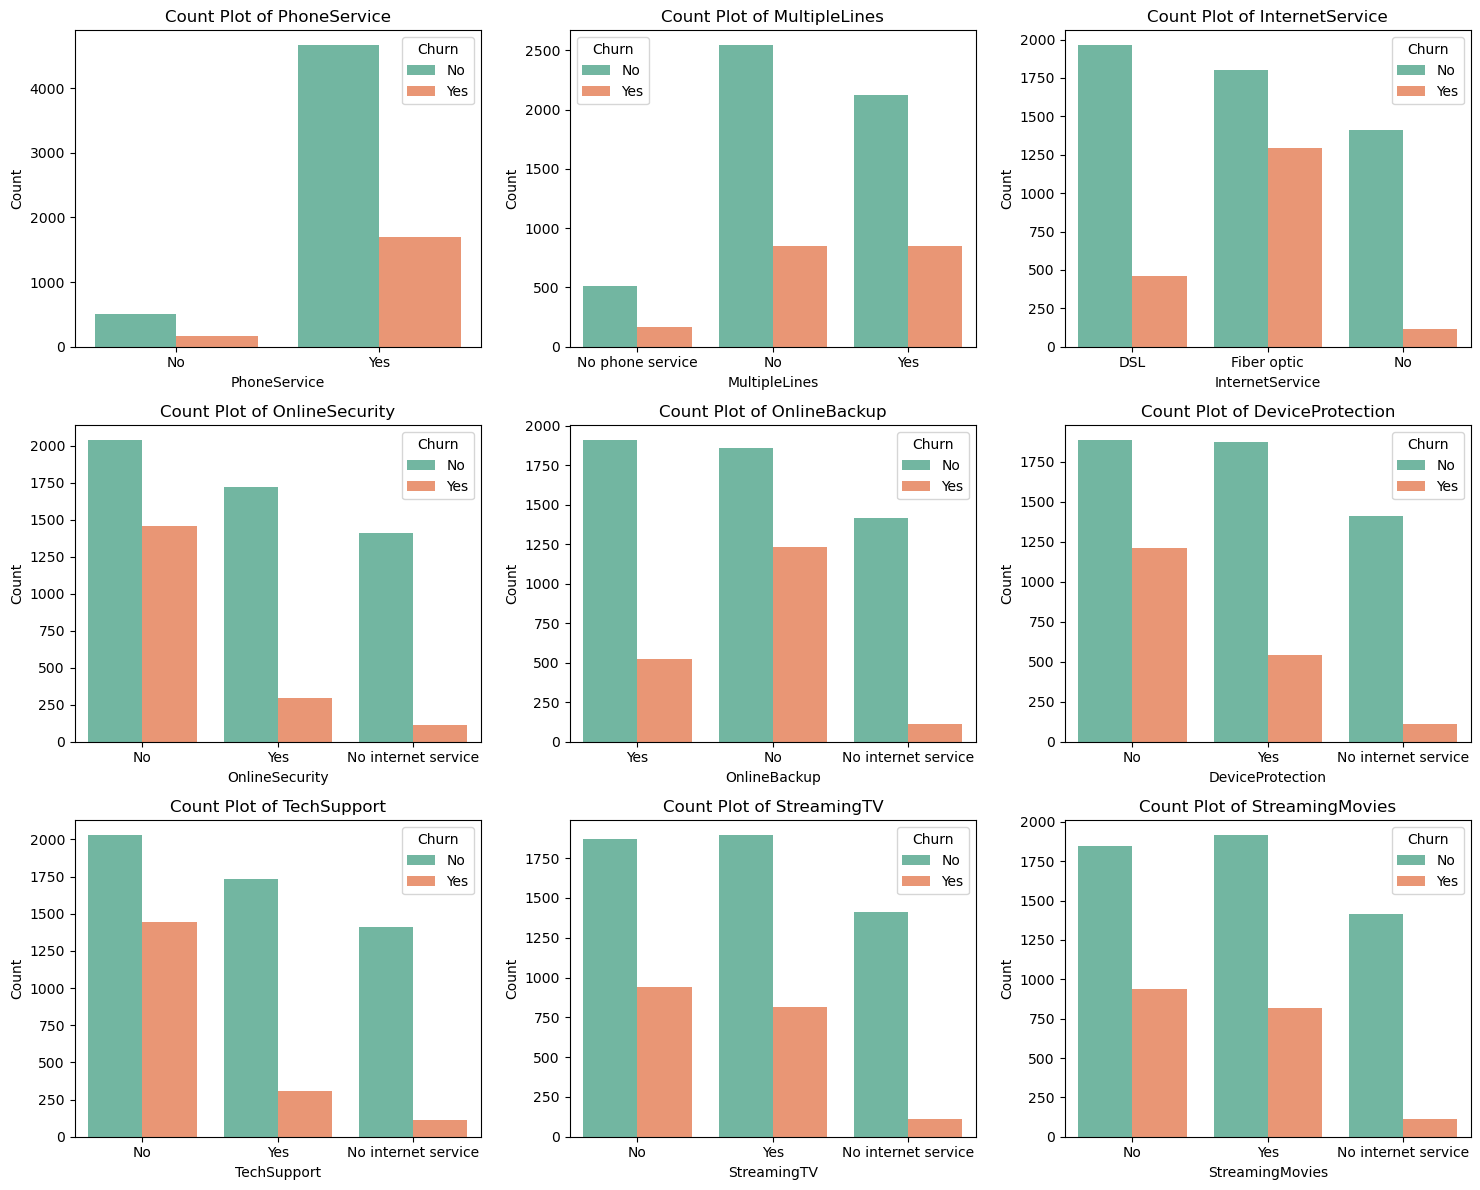

In [98]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"], palette='Set2')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

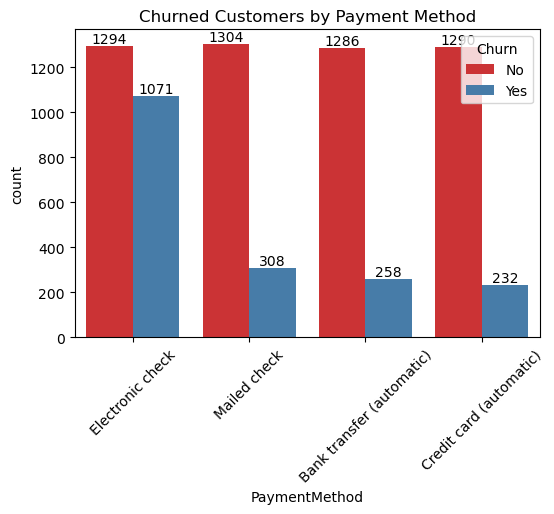

In [93]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn",palette="Set1")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he is using electronic check as a payment method.

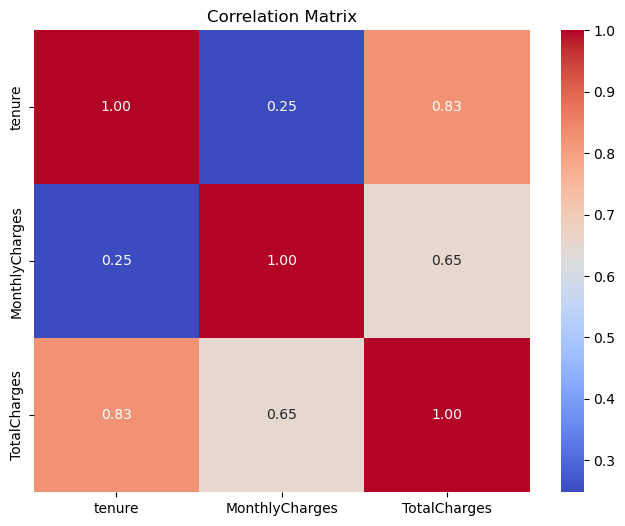

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

| Feature Pair                          | Correlation | Interpretation                                                                                                                                                          |
| ------------------------------------- | ----------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`tenure` & `TotalCharges`**         | **0.83**    | **Strong positive correlation** – Customers who have stayed longer tend to accumulate more total charges. This is expected as billing continues over time.              |
| **`MonthlyCharges` & `TotalCharges`** | **0.65**    | **Moderate positive correlation** – Higher monthly charges usually lead to higher total charges, although the relationship is not perfect due to differences in tenure. |
| **`tenure` & `MonthlyCharges`**       | **0.25**    | **Weak positive correlation** – Tenure and monthly charges are mostly independent. Long-tenure customers do not necessarily pay more per month.                         |
